In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import joblib
import time
import pickle

In [2]:
from multioutput_functions import *

In [3]:
singles = pd.read_hdf(r'C:/Users/juand/Research/h5_files/singles_230801.h5')
singles.drop(['OLD_SPT','MKO_J', 'MKO_H', 'MKO_K', '2MASS_J', '2MASS_H', '2MASS_KS','NAME'],axis=1,inplace=True)
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0
...,...,...,...,...,...
1044,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0
1045,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0
1046,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0
1047,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0


(array([ 1.,  1.,  1.,  6.,  7., 11., 15., 23., 25., 25., 37., 35., 24.,
        32., 25., 25., 29., 17., 21., 26., 30., 21., 27., 24., 22., 15.,
        17., 23., 20., 16.]),
 array([5.83613848e-18, 3.33090998e+00, 6.66181997e+00, 9.99272995e+00,
        1.33236399e+01, 1.66545499e+01, 1.99854599e+01, 2.33163699e+01,
        2.66472799e+01, 2.99781898e+01, 3.33090998e+01, 3.66400098e+01,
        3.99709198e+01, 4.33018298e+01, 4.66327398e+01, 4.99636497e+01,
        5.32945597e+01, 5.66254697e+01, 5.99563797e+01, 6.32872897e+01,
        6.66181997e+01, 6.99491096e+01, 7.32800196e+01, 7.66109296e+01,
        7.99418396e+01, 8.32727496e+01, 8.66036596e+01, 8.99345695e+01,
        9.32654795e+01, 9.65963895e+01, 9.99272995e+01]),
 <BarContainer object of 30 artists>)

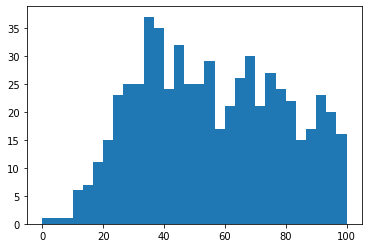

In [4]:
plt.hist(singles.J_SNR[singles.J_SNR<100],bins=30)

In [5]:
wave = singles['WAVE'][0]
wavegrid_list=list(wave)
wave = np.array(wave)
wavegrid=wave

In [6]:
df = pd.read_hdf(r'C:/Users/juand/Research/h5_files/standards_230801.h5').reset_index(drop=True)
STANDARDS = {
    "WAVE": df["WAVE"].iloc[0],
    "SPT": df["SPT"],
    "FLUX": df["FLUX"],
    "UNC": df["UNCERTAINTY"],
}

In [7]:
typenum=[]
for i in range(len(singles)):
    typenum.append(typeToNum(singles['SPT'][i]))
singles['SPT_NUM']=typenum
singles = singles.loc[singles['SPT_NUM']>15*np.ones(len(singles))]
singles = singles.reset_index(drop=True)
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT,SPT_NUM
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0,16.0
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0,17.0
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0,16.0
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0,16.0
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0,16.0
...,...,...,...,...,...,...
1041,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0,38.0
1042,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0,38.0
1043,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0,38.0
1044,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0,39.0


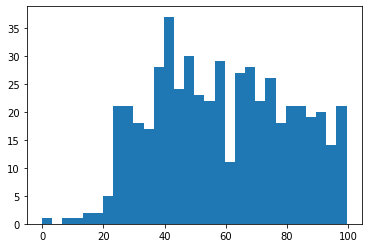

In [8]:
newsnr=[]
for i in range(len(singles)):
    flux=singles['FLUX'][i]
    uncer=singles['UNCERTAINTY'][i]
    newsnr.append(measureSN(wave,flux,uncer))
singles['J_SNR_2']=newsnr
plt.hist(singles.J_SNR_2[singles.J_SNR_2<100],bins=30)
singles.drop(['J_SNR_2'],axis=1,inplace=True)

In [9]:
snrclass=[]
for i in range(len(singles)):
    snrQ = singles['J_SNR'][i]
    if snrQ<50:
        snrclass.append('low')
    elif (snrQ>=50)&(snrQ<100):
        snrclass.append('mid')
    else:
        snrclass.append('hig')
singles['SNR_CLASS']=snrclass

In [10]:
drop_unc = []
for position, uncertainty_i in enumerate(np.array(singles['UNCERTAINTY'])):
    if np.any(uncertainty_i<0)|np.any(np.isnan(uncertainty_i))|np.any(np.isinf(uncertainty_i)):
        drop_unc.append(position)
singles = singles.drop(drop_unc).reset_index(drop=True)

In [11]:
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT,SPT_NUM,SNR_CLASS
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0,16.0,mid
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0,17.0,hig
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0,16.0,hig
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0,16.0,mid
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0,16.0,hig
...,...,...,...,...,...,...,...
1018,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0,38.0,low
1019,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0,38.0,low
1020,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0,38.0,low
1021,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0,39.0,low


In [12]:
def fast_classify2(
    wave,
    flux,
    unc,
    fit_range=[0.9, 2.4],
    standards=STANDARDS,
    telluric=False,
    method="full",
):

    if method == "kirkpatrick":
        fit_range = [0.9, 1.4]
    elif method == "full":
        fit_range = [0.9, 2.4]
    else:
        pass

    w = np.where(np.logical_and(wave >= fit_range[0], wave <= fit_range[1]))[0]

    scales, chi = [], []

    weights = np.ones(len(wave))

    if telluric == True:
        msk = np.ones(len(weights))
        msk[
            np.where(
                np.logical_or(
                    np.logical_and(wavegrid > 1.35, wavegrid < 1.42),
                    np.logical_and(wavegrid > 1.8, wavegrid < 1.95),
                )
            )
        ] = 0
        weights = weights * msk

    # Loop through standards
    for std in standards["FLUX"]:
        scale = np.nansum(weights * (flux * std) / (unc**2)) / np.nansum(
            (weights * std**2) / (unc**2)
        )
        scales.append(scale)
        chisquared = np.nansum(
            weights * ((flux - (std * scales[-1])) ** 2) / (unc**2)
        )
        chi.append(chisquared)
    
    return standards["SPT"][np.argmin(chi)]

In [13]:
s17low = singles[(singles.SPT_NUM==17)&(singles.SNR_CLASS=='low')].reset_index(drop=True)
f17low, u17low = normalize(wave,s17low.FLUX[1],s17low.UNCERTAINTY[1])
s24low = singles[(singles.SPT_NUM==24)&(singles.SNR_CLASS=='low')].reset_index(drop=True)
f24low, u24low = normalize(wave,s24low.FLUX[0],s24low.UNCERTAINTY[0])

s17mid = singles[(singles.SPT_NUM==17)&(singles.SNR_CLASS=='mid')].reset_index(drop=True)
f17mid, u17mid = normalize(wave,s17mid.FLUX[1],s17mid.UNCERTAINTY[1])
s24mid = singles[(singles.SPT_NUM==24)&(singles.SNR_CLASS=='mid')].reset_index(drop=True)
f24mid, u24mid = normalize(wave,s24mid.FLUX[1],s24mid.UNCERTAINTY[1])

s17hig = singles[(singles.SPT_NUM==17)&(singles.SNR_CLASS=='hig')].reset_index(drop=True)
f17hig, u17hig = normalize(wave,s17hig.FLUX[0],s17hig.UNCERTAINTY[0])
s24hig = singles[(singles.SPT_NUM==24)&(singles.SNR_CLASS=='hig')].reset_index(drop=True)
f24hig, u24hig = normalize(wave,s24hig.FLUX[0],s24hig.UNCERTAINTY[0])

In [14]:
binlow = f17low+f24low
ulow   = u17low+u24low
binlow, ulow = normalize(wave,binlow,ulow)
Slow = df[df.SPT==fast_classify2(wave,binlow,ulow)].reset_index(drop=True)
Sflow, Sulow = normalize(wave,Slow.FLUX[0],Slow.UNCERTAINTY[0])
dlow = binlow-Sflow

binmid = f17mid+f24mid
umid   = u17mid+u24mid
binmid, umid = normalize(wave,binmid,umid)
Smid = df[df.SPT==fast_classify2(wave,binmid,umid)].reset_index(drop=True)
Sfmid, Sumid = normalize(wave,Smid.FLUX[0],Smid.UNCERTAINTY[0])
dmid = binmid-Sfmid

binhig = f17hig+f24hig
uhig   = u17hig+u24hig
binhig, uhig = normalize(wave,binhig,uhig)
Shig = df[df.SPT==fast_classify2(wave,binhig,uhig)].reset_index(drop=True)
Sfhig, Suhig = normalize(wave,Shig.FLUX[0],Shig.UNCERTAINTY[0])
dhig = binhig-Sfhig

In [15]:
start = time.time()
flux_cols_dic = {}
for j in range(len(singles['FLUX'][0])):
    fluxcol=[]
    for i in range(len(singles)):
        fluxcol.append(singles['FLUX'][i][j])
    fluxname='FLUX_'+str(j)
    flux_cols_dic[fluxname] = fluxcol
flux_cols_df = pd.DataFrame(flux_cols_dic)
singles = pd.concat([singles, flux_cols_df], axis=1)

singles = singles.sort_values(by=['SPT_NUM','J_SNR'], ascending=[True,False])
singles.reset_index(drop=True, inplace=True)
end = time.time()

Multioutput Random Forest LOW snr (<50)

In [16]:
with open('data/BinDF_low.pickle', 'rb') as f:
        BinDF_low = pickle.load(f)

In [17]:
BinDF_low = BinDF_low[BinDF_low.primary_type>24]
BinDF_low = BinDF_low[BinDF_low.primary_type<33]
BinDF_low = BinDF_low[BinDF_low.secondary_type>31]
BinDF_low = BinDF_low[BinDF_low.secondary_type<39]
BinDF_low.reset_index(drop=True,inplace=True)

In [18]:
with open('data/BinDF_low_Burg.pickle', 'wb') as f:
        pickle.dump(BinDF_low, f)

In [21]:
fastspt = [typeToNum(fast_classify(wave,fx,ns)) for fx, ns in zip(BinDF_low.system_interpolated_flux,BinDF_low.system_interpolated_noise)]
min(fastspt), max(fastspt)

(15.0, 39.0)

In [252]:
start = time.time()
MO_low, data_low = binary_multiOutput_classifier(BinDF_low,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

111.76850080490112


In [253]:
data_low

{'x_test': array([[ 0.14790174,  0.11402851,  0.22403803, ...,  0.22129754,
          0.21621754,  0.22097621],
        [ 0.00501624,  0.67602095,  0.71769397, ...,  0.49052755,
          0.18999303,  0.28472367],
        [ 0.25583878,  0.19182142,  0.23240097, ...,  0.31863528,
          0.2665564 ,  0.3463504 ],
        ...,
        [-0.64124426, -0.00423779,  0.14704028, ...,  0.25721809,
          0.10430057,  0.15169761],
        [ 0.25052469,  0.21153419,  0.12604058, ...,  0.34947701,
          0.29529916,  0.38532779],
        [ 0.17406382,  0.28080474,  0.2516636 , ...,  0.37491157,
          0.37617768,  0.32733334]]),
 'y_test': array([[27, 35],
        [27, 32],
        [27, 37],
        ...,
        [32, 32],
        [25, 32],
        [26, 38]], dtype=int64)}

In [254]:
yput1 = []
yput2 = []
for i in data_low['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_low_df = pd.DataFrame(data_low['x_test'])
data_low_df['prim']=yput1
data_low_df['seco']=yput2
data_low_df.to_csv('data/data_low_Burg_50est.csv',index=False)

In [255]:
x_test_low = data_low['x_test']
y_test_low = data_low['y_test']
print(len(x_test_low))

3360


In [256]:
joblib.dump(MO_low, 'MOclassifiers/MO_low_Burg_50est.pkl')

['MOclassifiers/MO_low_Burg_50est.pkl']

In [257]:
MO_low = joblib.load('MOclassifiers/MO_low_Burg_50est.pkl')

In [49]:
# df_data_low = pd.read_csv(r'data/data_low.csv')
# x_test_low = [[df_data_low[str(col)][i] for col in range(409)] for i in range(len(df_data_low))]
# y_test_low = [[df_data_low['prim'][i],df_data_low['seco'][i]] for i in range(len(df_data_low))]

In [258]:
start = time.time()
df_avgdiffprim_low, df_avgdiffseco_low, df_stdprim_low, df_stdseco_low, predsprim_low, predssec_low, realprim_low, realsec_low = binaryPrecision(x_test_low,y_test_low,MO_low, predictions=True)
end = time.time()
print(end-start)

12.97865629196167


-0.028257369614512612


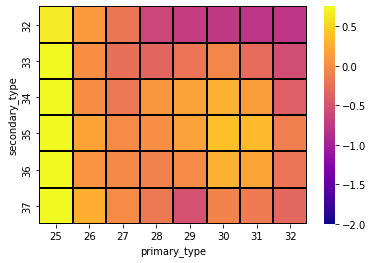

In [259]:
sns.heatmap(df_avgdiffprim_low.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_low.mean(axis = 0, skipna = True).mean())

0.0630019390331886


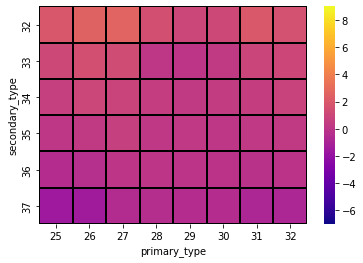

In [260]:
sns.heatmap(df_avgdiffseco_low.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_low.mean(axis = 0, skipna = True).mean())

0.5621554133195283


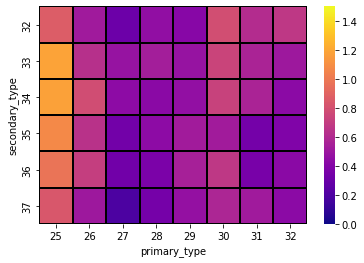

In [261]:
sns.heatmap(df_stdprim_low.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_low.mean(axis = 0, skipna = True).mean())

0.7270675879700916


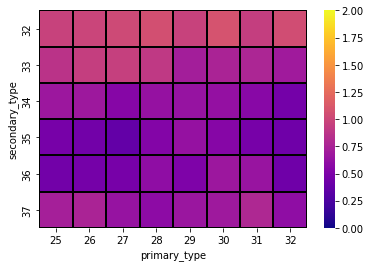

In [262]:
sns.heatmap(df_stdseco_low.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_low.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [1.3428532,
   1.3471608,
   2.2208893,
   2.2239618,
   2.2270296,
   2.2331493,
   2.239249,
   2.2422912,
   2.2453282,
   2.2544086,
   2.257425,
   2.2604363,
   2.2664435,
   2.2694392,
   2.27243,
   2.2843404,
   2.2902644],
  'importance': [0.02369862469137377,
   0.020411334916603865,
   0.014445903609240734,
   0.049717323551166065,
   0.01250316151243698,
   0.01969258953765654,
   0.012509866029898864,
   0.08978952366006107,
   0.22506029825354593,
   0.05168603463696865,
   0.07880811471532395,
   0.017726403488710376,
   0.015155887353925417,
   0.014421223233262417,
   0.019011939952211048,
   0.015008232555941222,
   0.05396388321820722]},
 'secondary_type': {'wavegrid': [1.1921266,
   1.196399,
   1.2006752,
   1.2049553,
   1.2092391,
   1.2135262,
   1.2178166,
   1.22211,
   1.2264063,
   1.2997085,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3169771,
   1.3212926,
   1.4327725,
   1.5742917,
   1.618635,
   1.6226279,
   1.630594]

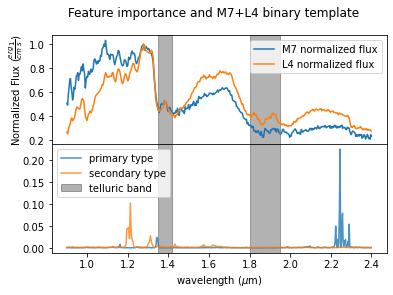

In [263]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17low)
ax[0].plot(wavegrid,f24low)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_low = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_low.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_, alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        dd.append(wavegrid[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary template')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_low['primary_type']['wavegrid'] = ddd[0]
feat_impts_low['primary_type']['importance'] = eee[0]
feat_impts_low['secondary_type']['wavegrid'] = ddd[1]
feat_impts_low['secondary_type']['importance'] = eee[1]
feat_impts_low

In [264]:
precisionprim_low1, recallprim_low1, f1_scoreprim_low1, accuracyprim_low1 = calculate_metrics(realprim_low,predsprim_low,1)
precisionsec_low1, recallsec_low1, f1_scoresec_low1, accuracysec_low1 = calculate_metrics(realsec_low,predssec_low,1)
precisionprim_low3, recallprim_low3, f1_scoreprim_low3, accuracyprim_low3 = calculate_metrics(realprim_low,predsprim_low,3)
precisionsec_low3, recallsec_low3, f1_scoresec_low3, accuracysec_low3 = calculate_metrics(realsec_low,predssec_low,3)

In [265]:
with open('data/precisionprim_low1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_low1, file)
with open('data/recallprim_low1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_low1, file)
with open('data/f1_scoreprim_low1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_low1, file)
with open('data/accuracyprim_low1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_low1, file)

In [266]:
with open('data/precisionsec_low1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_low1, file)
with open('data/recallsec_low1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_low1, file)
with open('data/f1_scoresec_low1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_low1, file)
with open('data/accuracysec_low1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_low1, file)

In [267]:
with open('data/precisionprim_low3_Burd_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_low3, file)
with open('data/recallprim_low3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_low3, file)
with open('data/f1_scoreprim_low3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_low3, file)
with open('data/accuracyprim_low3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_low3, file)

In [268]:
with open('data/precisionsec_low3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_low3, file)
with open('data/recallsec_low3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_low3, file)
with open('data/f1_scoresec_low3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_low3, file)
with open('data/accuracysec_low3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_low3, file)

Multioutput Random Fores MID snr (50<snr<100)

In [23]:
with open('data/BinDF_mid.pickle', 'rb') as f:
        BinDF_mid = pickle.load(f)

In [24]:
BinDF_mid = BinDF_mid[BinDF_mid.primary_type>24]
BinDF_mid = BinDF_mid[BinDF_mid.primary_type<33]
BinDF_mid = BinDF_mid[BinDF_mid.secondary_type>31]
BinDF_mid = BinDF_mid[BinDF_mid.secondary_type<39]
BinDF_mid.reset_index(drop=True,inplace=True)

In [25]:
with open('data/BinDF_mid_Burg.pickle', 'wb') as f:
        pickle.dump(BinDF_mid, f)

In [26]:
fastspt = [typeToNum(fast_classify(wave,fx,ns)) for fx, ns in zip(BinDF_mid.system_interpolated_flux,BinDF_mid.system_interpolated_noise)]
min(fastspt), max(fastspt)

(22.0, 34.0)

In [273]:
start = time.time()
clfmid, data_mid = binary_multiOutput_classifier(BinDF_mid,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

110.14508533477783


In [274]:
x_test_mid = data_mid['x_test']
y_test_mid = data_mid['y_test']

In [275]:
yput1 = []
yput2 = []
for i in data_mid['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_mid_df = pd.DataFrame(data_mid['x_test'])
data_mid_df['prim']=yput1
data_mid_df['seco']=yput2
data_mid_df.to_csv('data/data_mid_Burg_50est.csv',index=False)

In [276]:
joblib.dump(clfmid, 'MOclassifiers/MO_mid_Burg_50est.pkl')

['MOclassifiers/MO_mid_Burg_50est.pkl']

In [277]:
MO_mid = joblib.load('MOclassifiers/MO_mid_Burg_50est.pkl')

In [278]:
# df_data_mid = pd.read_csv(r'data/data_mid.csv')
# x_test_mid = [[df_data_mid[str(col)][i] for col in range(409)] for i in range(len(df_data_mid))]
# y_test_mid = [[df_data_mid['prim'][i],df_data_mid['seco'][i]] for i in range(len(df_data_mid))]

In [279]:
start = time.time()
df_avgdiffprim_mid, df_avgdiffseco_mid, df_stdprim_mid, df_stdseco_mid, predsprim_mid, predssec_mid, realprim_mid, realsec_mid = binaryPrecision(x_test_mid,y_test_mid,MO_mid,predictions=True)
end = time.time()
print(end-start)

12.719639301300049


-0.013155633266065487


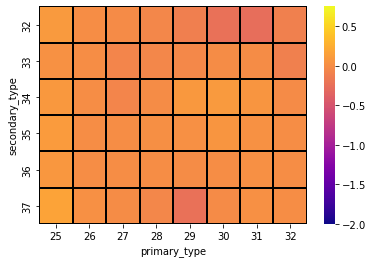

In [280]:
sns.heatmap(df_avgdiffprim_mid.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_mid.mean(axis = 0, skipna = True).mean())

-0.003316258762236783


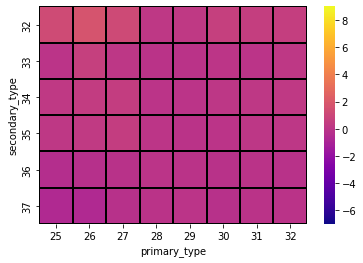

In [281]:
sns.heatmap(df_avgdiffseco_mid.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_mid.mean(axis = 0, skipna = True).mean())

0.30722858819612375


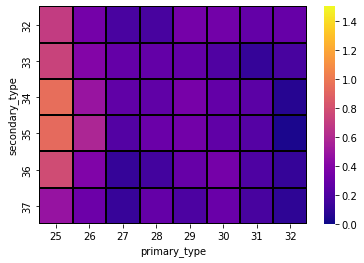

In [282]:
sns.heatmap(df_stdprim_mid.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_mid.mean(axis = 0, skipna = True).mean())

0.5143379420389403


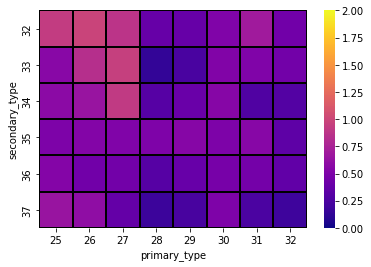

In [283]:
sns.heatmap(df_stdseco_mid.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_mid.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [1.2479242,
   1.9666836,
   2.0211103,
   2.0311828,
   2.2754152,
   2.3738995],
  'importance': [0.06799297067058346,
   0.3960745844097474,
   0.14984818045808296,
   0.12300291599938246,
   0.035395150820039696,
   0.025197984633014422]},
 'secondary_type': {'wavegrid': [1.2049553,
   1.2092391,
   1.2135262,
   1.2997085,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3514667,
   1.3557706,
   1.4285238,
   1.4834142,
   1.582411],
  'importance': [0.03755877133275238,
   0.024342305751290774,
   0.26836902650790345,
   0.06165194726355398,
   0.015537524219793564,
   0.02046007157066733,
   0.028043912536808536,
   0.023548443006568505,
   0.018558426573314055,
   0.019525636706586854,
   0.013993241045217042,
   0.0136989941486999]}}

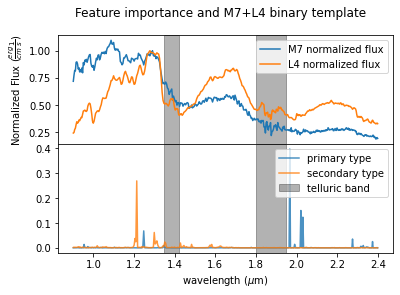

In [284]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17mid)
ax[0].plot(wavegrid,f24mid)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_mid = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_mid.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_, alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        dd.append(wavegrid[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary template')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_mid['primary_type']['wavegrid'] = ddd[0]
feat_impts_mid['primary_type']['importance'] = eee[0]
feat_impts_mid['secondary_type']['wavegrid'] = ddd[1]
feat_impts_mid['secondary_type']['importance'] = eee[1]
feat_impts_mid

In [285]:
precisionprim_mid1, recallprim_mid1, f1_scoreprim_mid1, accuracyprim_mid1 = calculate_metrics(realprim_mid,predsprim_mid,1)
precisionsec_mid1, recallsec_mid1, f1_scoresec_mid1, accuracysec_mid1 = calculate_metrics(realsec_mid,predssec_mid,1)
precisionprim_mid3, recallprim_mid3, f1_scoreprim_mid3, accuracyprim_mid3 = calculate_metrics(realprim_mid,predsprim_mid,3)
precisionsec_mid3, recallsec_mid3, f1_scoresec_mid3, accuracysec_mid3 = calculate_metrics(realsec_mid,predssec_mid,3)

In [286]:
with open('data/precisionprim_mid1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_mid1, file)
with open('data/recallprim_mid1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_mid1, file)
with open('data/f1_scoreprim_mid1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_mid1, file)
with open('data/accuracyprim_mid1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_mid1, file)

In [287]:
with open('data/precisionsec_mid1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_mid1, file)
with open('data/recallsec_mid1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_mid1, file)
with open('data/f1_scoresec_mid1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_mid1, file)
with open('data/accuracysec_mid1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_mid1, file)

In [288]:
with open('data/precisionprim_mid3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_mid3, file)
with open('data/recallprim_mid3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_mid3, file)
with open('data/f1_scoreprim_mid3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_mid3, file)
with open('data/accuracyprim_mid3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_mid3, file)

In [289]:
with open('data/precisionsec_mid3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_mid3, file)
with open('data/recallsec_mid3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_mid3, file)
with open('data/f1_scoresec_mid3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_mid3, file)
with open('data/accuracysec_mid3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_mid3, file)

Multioutput Random Forest HIG snr (>100)

In [27]:
with open('data/BinDF_hig.pickle', 'rb') as f:
        BinDF_hig = pickle.load(f)

In [28]:
BinDF_hig = BinDF_hig[BinDF_hig.primary_type>24]
BinDF_hig = BinDF_hig[BinDF_hig.primary_type<33]
BinDF_hig = BinDF_hig[BinDF_hig.secondary_type>31]
BinDF_hig = BinDF_hig[BinDF_hig.secondary_type<39]
BinDF_hig.reset_index(drop=True,inplace=True)

In [32]:
min(BinDF_hig.primary_type)

25

In [29]:
with open('data/BinDF_hig_Burg.pickle', 'wb') as f:
        pickle.dump(BinDF_hig, f)

In [30]:
fastspt = [typeToNum(fast_classify(wave,fx,ns)) for fx, ns in zip(BinDF_hig.system_interpolated_flux,BinDF_hig.system_interpolated_noise)]
min(fastspt), max(fastspt)

(22.0, 34.0)

In [129]:
start = time.time()
clfhig, data_hig = binary_multiOutput_classifier(BinDF_hig,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

41.50168418884277


In [130]:
yput1 = []
yput2 = []
for i in data_hig['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_hig_df = pd.DataFrame(data_hig['x_test'])
data_hig_df['prim']=yput1
data_hig_df['seco']=yput2
data_hig_df
data_hig_df.to_csv('data/data_hig_Burg_50est.csv',index=False)

In [131]:
x_test_hig = data_hig['x_test']
y_test_hig = data_hig['y_test']

In [132]:
joblib.dump(clfhig, 'MOclassifiers/MO_hig_Burg_50est.pkl')

['MOclassifiers/MO_hig_Burg_50est.pkl']

In [133]:
MO_hig = joblib.load('MOclassifiers/MO_hig_Burg_50est.pkl')

In [134]:
# df_data_hig = pd.read_csv(r'data/data_hig.csv')
# x_test_hig = [[df_data_hig[str(col)][i] for col in range(409)] for i in range(len(df_data_hig))]
# y_test_hig = [[df_data_hig['prim'][i],df_data_hig['seco'][i]] for i in range(len(df_data_hig))]

In [135]:
start = time.time()
df_avgdiffprim_hig, df_avgdiffseco_hig, df_stdprim_hig, df_stdseco_hig, predsprim_hig, predssec_hig, realprim_hig, realsec_hig = binaryPrecision(x_test_hig,y_test_hig,MO_hig, predictions=True)
end = time.time()
print(end-start)

7.807458400726318


0.0038802083333334125


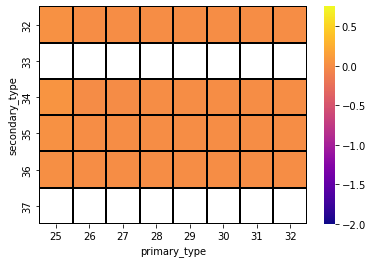

In [236]:
sns.heatmap(df_avgdiffprim_hig.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_hig.mean(axis = 0, skipna = True).mean())

-0.013195188492063248


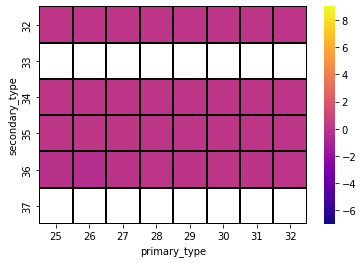

In [237]:
sns.heatmap(df_avgdiffseco_hig.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_hig.mean(axis = 0, skipna = True).mean())

0.12444174895662426


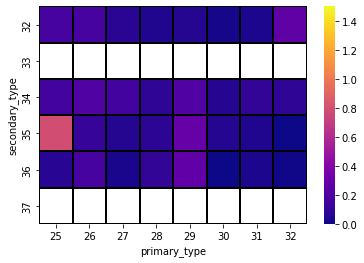

In [238]:
sns.heatmap(df_stdprim_hig.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_hig.mean(axis = 0, skipna = True).mean())

0.16803397751794147


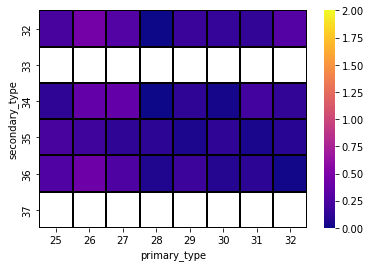

In [239]:
sns.heatmap(df_stdseco_hig.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_hig.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [1.0268184,
   1.3514667,
   2.3512332,
   2.3540823,
   2.3795228],
  'importance': [0.07868068752380578,
   0.06716474112695328,
   0.13380928474573026,
   0.03026157964550967,
   0.5644199451124775]},
 'secondary_type': {'wavegrid': [1.0790101,
   1.2049553,
   1.2264063,
   1.6146357,
   1.618635,
   1.6424943,
   2.0211103],
  'importance': [0.021636235991066274,
   0.23094865165640868,
   0.3715265449767379,
   0.03535178003992245,
   0.020898165445676752,
   0.03691874214218578,
   0.03592875310952344]}}

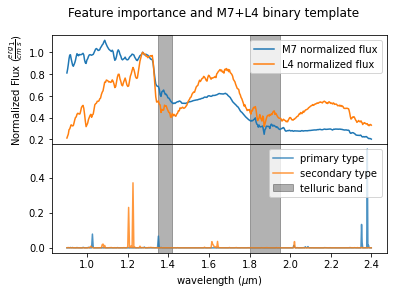

In [246]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17hig)
ax[0].plot(wavegrid,f24hig)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_hig = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfhig.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_, alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        dd.append(wavegrid[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary template')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_hig['primary_type']['wavegrid'] = ddd[0]
feat_impts_hig['primary_type']['importance'] = eee[0]
feat_impts_hig['secondary_type']['wavegrid'] = ddd[1]
feat_impts_hig['secondary_type']['importance'] = eee[1]
feat_impts_hig

In [141]:
precisionprim_hig1, recallprim_hig1, f1_scoreprim_hig1, accuracyprim_hig1 = calculate_metrics(realprim_hig,predsprim_hig,1)
precisionsec_hig1, recallsec_hig1, f1_scoresec_hig1, accuracysec_hig1 = calculate_metrics(realsec_hig,predssec_hig,1)
precisionprim_hig3, recallprim_hig3, f1_scoreprim_hig3, accuracyprim_hig3 = calculate_metrics(realprim_hig,predsprim_hig,3)
precisionsec_hig3, recallsec_hig3, f1_scoresec_hig3, accuracysec_hig3 = calculate_metrics(realsec_hig,predssec_hig,3)

In [142]:
with open('data/precisionprim_hig1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_hig1, file)
with open('data/recallprim_hig1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_hig1, file)
with open('data/f1_scoreprim_hig1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_hig1, file)
with open('data/accuracyprim_hig1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_hig1, file)

In [143]:
with open('data/precisionsec_hig1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_hig1, file)
with open('data/recallsec_hig1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_hig1, file)
with open('data/f1_scoresec_hig1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_hig1, file)
with open('data/accuracysec_hig1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_hig1, file)

In [144]:
with open('data/precisionprim_hig3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_hig3, file)
with open('data/recallprim_hig3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_hig3, file)
with open('data/f1_scoreprim_hig3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_hig3, file)
with open('data/accuracyprim_hig3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_hig3, file)

In [145]:
with open('data/precisionsec_hig3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_hig3, file)
with open('data/recallsec_hig3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_hig3, file)
with open('data/f1_scoresec_hig3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_hig3, file)
with open('data/accuracysec_hig3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_hig3, file)

Including Difference Spectrum

Low

In [146]:
with open('data/BinDF_low_d.pickle', 'rb') as f:
        BinDF_low_d = pickle.load(f)

In [147]:
BinDF_low_d = BinDF_low_d[BinDF_low_d.primary_type>24]
BinDF_low_d = BinDF_low_d[BinDF_low_d.primary_type<33]
BinDF_low_d = BinDF_low_d[BinDF_low_d.secondary_type>31]
BinDF_low_d = BinDF_low_d[BinDF_low_d.secondary_type<39]
BinDF_low_d.reset_index(drop=True,inplace=True)

In [148]:
with open('data/BinDF_low_d_Burg.pickle', 'wb') as f:
        pickle.dump(BinDF_low_d, f)

Text(0.5, 1.0, 'SNR Distribution')

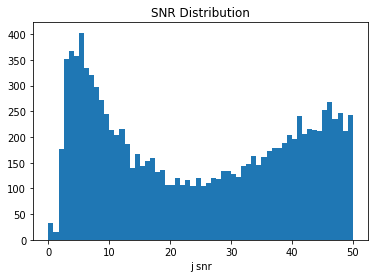

In [149]:
fig, axe = plt.subplots()
axe.hist(BinDF_low_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [150]:
start = time.time()
clflow_d, data_low_d = binary_multiOutput_classifier(BinDF_low_d,difference=True,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

239.9936978816986


In [151]:
yput1 = []
yput2 = []
for i in data_low_d['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_low_d_df = pd.DataFrame(data_low_d['x_test'])
data_low_d_df['prim']=yput1
data_low_d_df['seco']=yput2
data_low_d_df.to_csv('data/data_low_d_Burg_50est.csv',index=False)

In [152]:
x_test_low_d = data_low_d['x_test']
y_test_low_d = data_low_d['y_test']

In [153]:
joblib.dump(clflow_d, 'MOclassifiers/MO_low_d_Burg_50est.pkl')

['MOclassifiers/MO_low_d_Burg_50est.pkl']

In [154]:
MO_low_d = joblib.load('MOclassifiers/MO_low_d_Burg_50est.pkl')

In [155]:
# df_data_low_d = pd.read_csv(r'data/data_low_d.csv')
# x_test_low_d = [[df_data_low_d[str(col)][i] for col in range(818)] for i in range(len(df_data_low_d))]
# y_test_low_d = [[df_data_low_d['prim'][i],df_data_low_d['seco'][i]] for i in range(len(df_data_low_d))]

In [156]:
start = time.time()
df_avgdiffprim_low_d, df_avgdiffseco_low_d, df_stdprim_low_d, df_stdseco_low_d, predsprim_low_d, predssec_low_d, realprim_low_d, realsec_low_d = binaryPrecision(x_test_low_d,y_test_low_d,MO_low_d, predictions=True)
end = time.time()
print(end-start)

14.490747928619385


-0.04815335740243136


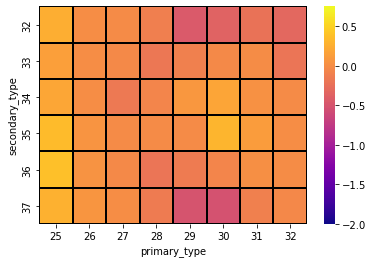

In [240]:
sns.heatmap(df_avgdiffprim_low_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_low_d.mean(axis = 0, skipna = True).mean())

-0.016621952947845863


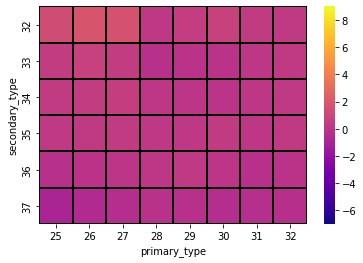

In [241]:
sns.heatmap(df_avgdiffseco_low_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_low_d.mean(axis = 0, skipna = True).mean())

0.39649516768121384


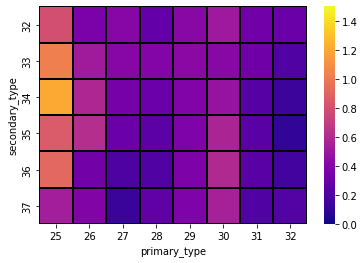

In [242]:
sns.heatmap(df_stdprim_low_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_low_d.mean(axis = 0, skipna = True).mean())

0.611212133659637


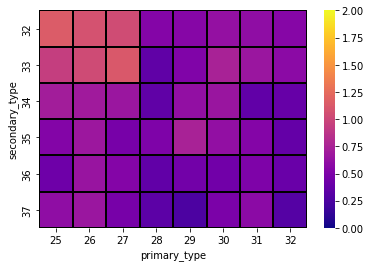

In [243]:
sns.heatmap(df_stdseco_low_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_low_d.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [1.3471608,
   1.3514667,
   1.9494247,
   1.9666836,
   1.9701208,
   1.9838215,
   1.9872348,
   2.2961676,
   2.3282678,
   2.3512332,
   2.362602,
   2.3710816,
   2.3795228,
   2.3823283,
   2.3935118,
   2.3962984,
   2.3990817],
  'importance': [0.03280741795356665,
   0.040855711160324784,
   0.040017320062385335,
   0.028591538522442617,
   0.17141230913702687,
   0.05307701330124232,
   0.13337084219008372,
   0.043697781034376104,
   0.014722868536707904,
   0.026675148931417952,
   0.013394099286759846,
   0.059363708672307364,
   0.026656149859513874,
   0.013271220587457083,
   0.052614745038232574,
   0.013620492969655146,
   0.027179793530618012]},
 'secondary_type': {'wavegrid': [0.9150805,
   1.196399,
   1.2006752,
   1.2049553,
   1.2092391,
   1.2135262,
   1.2178166,
   1.22211,
   1.3040264,
   1.3083439,
   1.3126608,
   1.5783545,
   1.582411,
   1.6226279],
  'importance': [0.021818640371453424,
   0.009303850438165402,
   0.00946

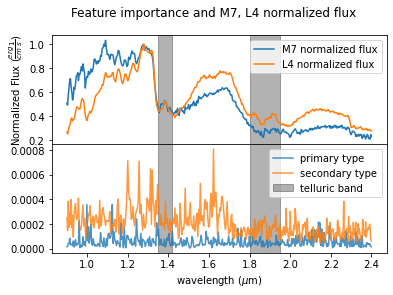

In [161]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17low)
ax[0].plot(wavegrid,f24low)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_low_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_low_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[:409], alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7, L4 normalized flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_low_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_low_d['primary_type']['importance'] = eee[0]
feat_impts_low_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_low_d['secondary_type']['importance'] = eee[1]
feat_impts_low_d

{'primary_type': {'wavegrid': [1.3471608,
   1.3514667,
   1.9494247,
   1.9666836,
   1.9701208,
   1.9838215,
   1.9872348,
   2.2961676,
   2.3282678,
   2.3512332,
   2.362602,
   2.3710816,
   2.3795228,
   2.3823283,
   2.3935118,
   2.3962984,
   2.3990817],
  'importance': [0.03280741795356665,
   0.040855711160324784,
   0.040017320062385335,
   0.028591538522442617,
   0.17141230913702687,
   0.05307701330124232,
   0.13337084219008372,
   0.043697781034376104,
   0.014722868536707904,
   0.026675148931417952,
   0.013394099286759846,
   0.059363708672307364,
   0.026656149859513874,
   0.013271220587457083,
   0.052614745038232574,
   0.013620492969655146,
   0.027179793530618012]},
 'secondary_type': {'wavegrid': [0.9150805,
   1.196399,
   1.2006752,
   1.2049553,
   1.2092391,
   1.2135262,
   1.2178166,
   1.22211,
   1.3040264,
   1.3083439,
   1.3126608,
   1.5783545,
   1.582411,
   1.6226279],
  'importance': [0.021818640371453424,
   0.009303850438165402,
   0.00946

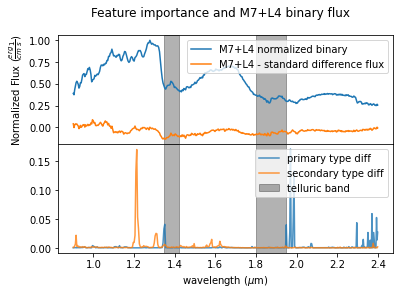

In [162]:
fig, ax = plt.subplots(2,1,sharex=True)


ax[0].plot(wavegrid,binlow)
ax[0].plot(wavegrid,dlow)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7+L4 normalized binary','M7+L4 - standard difference flux'])

feat_impts_low_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_low_d.estimators_:
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

for clf in MO_low_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[409:], alpha=0.8)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type diff', 'secondary type diff', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_low_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_low_d['primary_type']['importance'] = eee[0]
feat_impts_low_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_low_d['secondary_type']['importance'] = eee[1]
feat_impts_low_d

In [163]:
precisionprim_lowd1, recallprim_lowd1, f1_scoreprim_lowd1, accuracyprim_lowd1 = calculate_metrics(realprim_low_d,predsprim_low_d,1)
precisionsec_lowd1, recallsec_lowd1, f1_scoresec_lowd1, accuracysec_lowd1 = calculate_metrics(realsec_low_d,predssec_low_d,1)
precisionprim_lowd3, recallprim_lowd3, f1_scoreprim_lowd3, accuracyprim_lowd3 = calculate_metrics(realprim_low_d,predsprim_low_d,3)
precisionsec_lowd3, recallsec_lowd3, f1_scoresec_lowd3, accuracysec_lowd3 = calculate_metrics(realsec_low_d,predssec_low_d,3)

In [164]:
with open('data/precisionprim_lowd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_lowd1, file)
with open('data/recallprim_lowd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_lowd1, file)
with open('data/f1_scoreprim_lowd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_lowd1, file)
with open('data/accuracyprim_lowd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_lowd1, file)

In [165]:
with open('data/precisionsec_lowd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_lowd1, file)
with open('data/recallsec_lowd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_lowd1, file)
with open('data/f1_scoresec_lowd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_lowd1, file)
with open('data/accuracysec_lowd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_lowd1, file)

In [166]:
with open('data/precisionprim_lowd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_lowd3, file)
with open('data/recallprim_lowd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_lowd3, file)
with open('data/f1_scoreprim_lowd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_lowd3, file)
with open('data/accuracyprim_lowd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_lowd3, file)

In [167]:
with open('data/precisionsec_lowd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_lowd3, file)
with open('data/recallsec_lowd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_lowd3, file)
with open('data/f1_scoresec_lowd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_lowd3, file)
with open('data/accuracysec_lowd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_lowd3, file)

DIFFERENCE

Mid Snr

In [168]:
with open('data/BinDF_mid_d.pickle', 'rb') as f:
        BinDF_mid_d = pickle.load(f)

In [169]:
BinDF_mid_d = BinDF_mid_d[BinDF_mid_d.primary_type>24]
BinDF_mid_d = BinDF_mid_d[BinDF_mid_d.primary_type<33]
BinDF_mid_d = BinDF_mid_d[BinDF_mid_d.secondary_type>31]
BinDF_mid_d = BinDF_mid_d[BinDF_mid_d.secondary_type<39]
BinDF_mid_d.reset_index(drop=True,inplace=True)

In [170]:
with open('data/BinDF_mid_d_Burg.pickle', 'wb') as f:
        pickle.dump(BinDF_mid_d, f)

Text(0.5, 1.0, 'SNR Distribution')

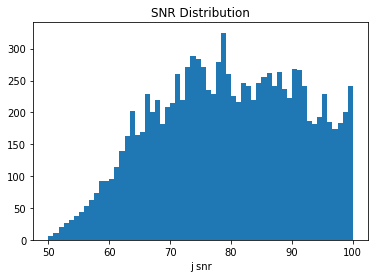

In [171]:
fig, axe = plt.subplots()
axe.hist(BinDF_mid_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [176]:
start = time.time()
clfmid_d, data_mid_d = binary_multiOutput_classifier(BinDF_mid_d,difference=True,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

231.6257300376892


In [177]:
yput1 = []
yput2 = []
for i in data_mid_d['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_mid_d_df = pd.DataFrame(data_mid_d['x_test'])
data_mid_d_df['prim']=yput1
data_mid_d_df['seco']=yput2
data_mid_d_df.to_csv('data/data_mid_d_Burg_50est.csv',index=False)

In [178]:
x_test_mid_d = data_mid_d['x_test']
y_test_mid_d = data_mid_d['y_test']

In [179]:
joblib.dump(clfmid_d, 'MOclassifiers/MO_mid_d_Burg_50est.pkl')

['MOclassifiers/MO_mid_d_Burg_50est.pkl']

In [180]:
# MO_mid_d = joblib.load('MOclassifiers/MO_mid_d_Burg_50est.pkl')

In [181]:
# df_data_mid_d = pd.read_csv(r'data/data_mid_d.csv')
# x_test_mid_d = [[df_data_mid_d[str(col)][i] for col in range(818)] for i in range(len(df_data_mid_d))]
# y_test_mid_d = [[df_data_mid_d['prim'][i],df_data_mid_d['seco'][i]] for i in range(len(df_data_mid_d))]

In [182]:
start = time.time()
df_avgdiffprim_mid_d, df_avgdiffseco_mid_d, df_stdprim_mid_d, df_stdseco_mid_d, predsprim_mid_d, predssec_mid_d, realprim_mid_d, realsec_mid_d = binaryPrecision(x_test_mid_d,y_test_mid_d,clfmid_d, predictions=True)
end = time.time()
print(end-start)

13.328813791275024


-0.023272757596503622


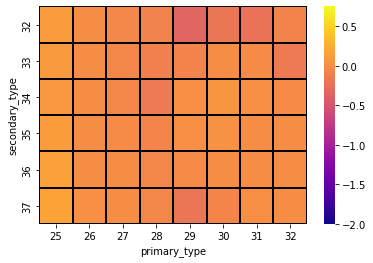

In [224]:
sns.heatmap(df_avgdiffprim_mid_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_mid_d.mean(axis = 0, skipna = True).mean())

0.017104822127240675


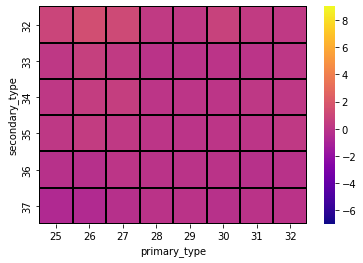

In [225]:
sns.heatmap(df_avgdiffseco_mid_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_mid_d.mean(axis = 0, skipna = True).mean())

0.2888180434527516


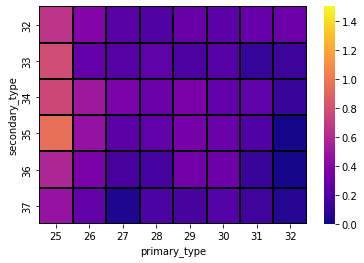

In [226]:
sns.heatmap(df_stdprim_mid_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_mid_d.mean(axis = 0, skipna = True).mean())

0.48361168365749235


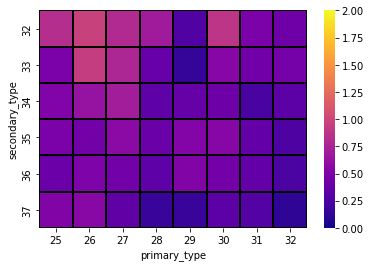

In [227]:
sns.heatmap(df_stdseco_mid_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_mid_d.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [2.0211103,
   1.2479242,
   1.9666836,
   1.9906434,
   2.0211103,
   2.3282678],
  'importance': [0.12197712319700668,
   0.0611713530397916,
   0.3131520597801923,
   0.04105176436056577,
   0.17684657916717297,
   0.04113299418264339]},
 'secondary_type': {'wavegrid': [1.062755,
   1.2049553,
   1.2135262,
   1.2997085,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3557706],
  'importance': [0.023330288217243447,
   0.0181866096225423,
   0.2807376905214975,
   0.04392622991090245,
   0.02178157400217696,
   0.015474986039045761,
   0.016668993890782916,
   0.021160669509076295]}}

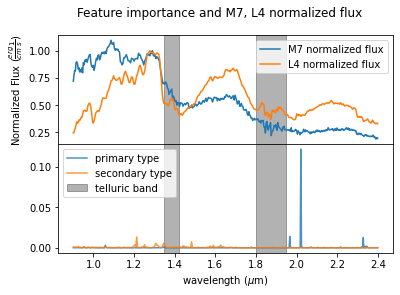

In [187]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17mid)
ax[0].plot(wavegrid,f24mid)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_mid_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfmid_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[:409], alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7, L4 normalized flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_mid_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_mid_d['primary_type']['importance'] = eee[0]
feat_impts_mid_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_mid_d['secondary_type']['importance'] = eee[1]
feat_impts_mid_d

{'primary_type': {'wavegrid': [2.0211103,
   1.2479242,
   1.9666836,
   1.9906434,
   2.0211103,
   2.3282678],
  'importance': [0.12197712319700668,
   0.0611713530397916,
   0.3131520597801923,
   0.04105176436056577,
   0.17684657916717297,
   0.04113299418264339]},
 'secondary_type': {'wavegrid': [1.062755,
   1.2049553,
   1.2135262,
   1.2997085,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3557706],
  'importance': [0.023330288217243447,
   0.0181866096225423,
   0.2807376905214975,
   0.04392622991090245,
   0.02178157400217696,
   0.015474986039045761,
   0.016668993890782916,
   0.021160669509076295]}}

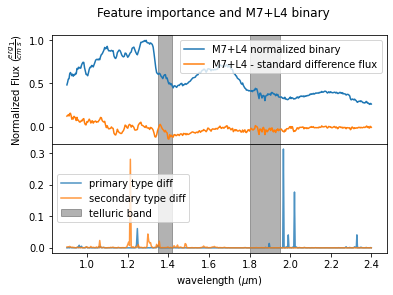

In [188]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,binmid)
ax[0].plot(wavegrid,dmid)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7+L4 normalized binary','M7+L4 - standard difference flux'])

feat_impts_mid_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfmid_d.estimators_:
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

for clf in clfmid_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[409:], alpha=0.8)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type diff', 'secondary type diff', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_mid_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_mid_d['primary_type']['importance'] = eee[0]
feat_impts_mid_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_mid_d['secondary_type']['importance'] = eee[1]
feat_impts_mid_d

In [189]:
precisionprim_midd1, recallprim_midd1, f1_scoreprim_midd1, accuracyprim_midd1 = calculate_metrics(realprim_mid_d,predsprim_mid_d,1)
precisionsec_midd1, recallsec_midd1, f1_scoresec_midd1, accuracysec_midd1 = calculate_metrics(realsec_mid_d,predssec_mid_d,1)
precisionprim_midd3, recallprim_midd3, f1_scoreprim_midd3, accuracyprim_midd3 = calculate_metrics(realprim_mid_d,predsprim_mid_d,3)
precisionsec_midd3, recallsec_midd3, f1_scoresec_midd3, accuracysec_midd3 = calculate_metrics(realsec_mid_d,predssec_mid_d,3)

In [190]:
with open('data/precisionprim_midd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_midd1, file)
with open('data/recallprim_midd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_midd1, file)
with open('data/f1_scoreprim_midd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_midd1, file)
with open('data/accuracyprim_midd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_midd1, file)

In [191]:
with open('data/precisionsec_midd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_midd1, file)
with open('data/recallsec_midd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_midd1, file)
with open('data/f1_scoresec_midd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_midd1, file)
with open('data/accuracysec_midd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_midd1, file)

In [192]:
with open('data/precisionprim_midd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_midd3, file)
with open('data/recallprim_midd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_midd3, file)
with open('data/f1_scoreprim_midd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_midd3, file)
with open('data/accuracyprim_midd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_midd3, file)

In [193]:
with open('data/precisionsec_midd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_midd3, file)
with open('data/recallsec_midd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_midd3, file)
with open('data/f1_scoresec_midd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_midd3, file)
with open('data/accuracysec_midd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_midd3, file)

DIFFERENCE

Hig Snr

In [172]:
with open('data/BinDF_hig_d.pickle', 'rb') as f:
        BinDF_hig_d = pickle.load(f)

In [173]:
BinDF_hig_d = BinDF_hig_d[BinDF_hig_d.primary_type>24]
BinDF_hig_d = BinDF_hig_d[BinDF_hig_d.primary_type<33]
BinDF_hig_d = BinDF_hig_d[BinDF_hig_d.secondary_type>31]
BinDF_hig_d = BinDF_hig_d[BinDF_hig_d.secondary_type<39]
BinDF_hig_d.reset_index(drop=True,inplace=True)

In [174]:
with open('data/BinDF_hig_d_Burg.pickle', 'wb') as f:
        pickle.dump(BinDF_hig_d, f)

Text(0.5, 1.0, 'SNR Distribution')

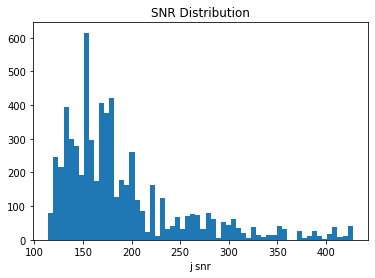

In [175]:
fig, axe = plt.subplots()
axe.hist(BinDF_hig_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [194]:
start = time.time()
clfhig_d, data_hig_d = binary_multiOutput_classifier(BinDF_hig_d,difference=True,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

84.42943167686462


In [195]:
yput1 = []
yput2 = []
for i in data_hig_d['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_hig_d_df = pd.DataFrame(data_hig_d['x_test'])
data_hig_d_df['prim']=yput1
data_hig_d_df['seco']=yput2
data_hig_d_df.to_csv('data/data_hig_d_Burg_50est.csv',index=False)

In [196]:
x_test_hig_d = data_hig_d['x_test']
y_test_hig_d = data_hig_d['y_test']

In [197]:
joblib.dump(clfhig_d, 'MOclassifiers/MO_hig_d_Burg_50est.pkl')

['MOclassifiers/MO_hig_d_Burg_50est.pkl']

In [198]:
# MO_hig_d = joblib.load('MOclassifiers/MO_hig_d_Burg_50est.pkl')

In [199]:
# df_data_hig_d = pd.read_csv(r'data/data_hig_d.csv')
# x_test_hig_d = [[df_data_hig_d[str(col)][i] for col in range(818)] for i in range(len(df_data_hig_d))]
# y_test_hig_d = [[df_data_hig_d['prim'][i],df_data_hig_d['seco'][i]] for i in range(len(df_data_hig_d))]

In [200]:
start = time.time()
df_avgdiffprim_hig_d, df_avgdiffseco_hig_d, df_stdprim_hig_d, df_stdseco_hig_d, predsprim_hig_d, predssec_hig_d, realprim_hig_d, realsec_hig_d = binaryPrecision(x_test_hig_d,y_test_hig_d,clfhig_d, predictions=True)
end = time.time()
print(end-start)

7.948461055755615


0.0017708333333329995


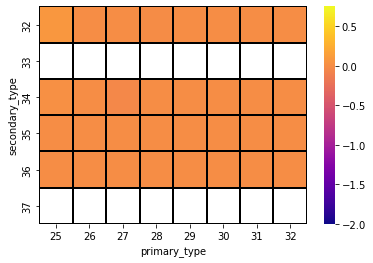

In [220]:
sns.heatmap(df_avgdiffprim_hig_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_hig_d.mean(axis = 0, skipna = True).mean())

0.0007734375000002514


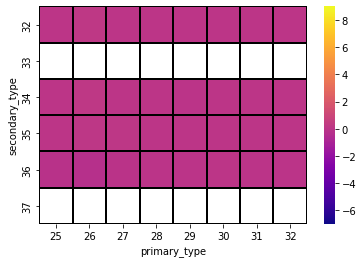

In [221]:
sns.heatmap(df_avgdiffseco_hig_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_hig_d.mean(axis = 0, skipna = True).mean())

0.11325570990526626


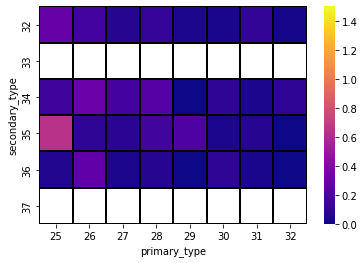

In [222]:
sns.heatmap(df_stdprim_hig_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_hig_d.mean(axis = 0, skipna = True).mean())

0.16019503568676313


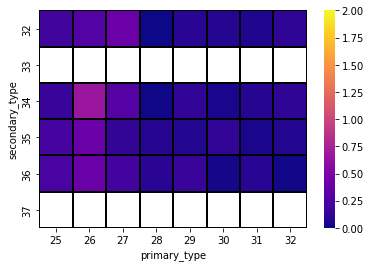

In [223]:
sns.heatmap(df_stdseco_hig_d.drop([i for i in range(16,25)]+[33,34,35,36,37,38,39],axis=1).drop([i for i in range(16,32)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_hig_d.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [1.0268184,
   1.3514667,
   2.3512332,
   1.0268184,
   1.3514667,
   2.3512332,
   2.38513],
  'importance': [0.042034150472186255,
   0.031819259680682374,
   0.3257572150505591,
   0.03342418023137814,
   0.034439053177774764,
   0.3722098200599021,
   0.030844281622369022]},
 'secondary_type': {'wavegrid': [1.2049553,
   1.2135262,
   1.2264063,
   1.6146357,
   1.618635,
   1.6345673,
   1.6424943,
   1.2049553,
   1.2264063,
   1.6146357,
   1.618635,
   1.6345673,
   2.0177436,
   2.3311558],
  'importance': [0.1514775179080857,
   0.010804935059276169,
   0.13908308123039448,
   0.023289973024673744,
   0.01534812935589296,
   0.011453338204009213,
   0.010151760899033063,
   0.17337470716171788,
   0.11564943130377969,
   0.01654644981427437,
   0.01564140149218167,
   0.010301509058822805,
   0.012497741986597886,
   0.010643324919532458]}}

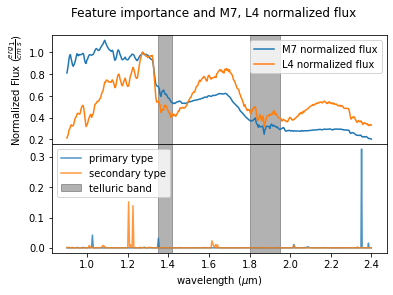

In [205]:
fig, ax = plt.subplots(2,1,sharex=True)


ax[0].plot(wavegrid,f17hig)
ax[0].plot(wavegrid,f24hig)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_hig_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfhig_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[:409], alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7, L4 normalized flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_hig_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_hig_d['primary_type']['importance'] = eee[0]
feat_impts_hig_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_hig_d['secondary_type']['importance'] = eee[1]
feat_impts_hig_d

{'primary_type': {'wavegrid': [1.0268184,
   1.3514667,
   2.3512332,
   1.0268184,
   1.3514667,
   2.3512332,
   2.38513],
  'importance': [0.042034150472186255,
   0.031819259680682374,
   0.3257572150505591,
   0.03342418023137814,
   0.034439053177774764,
   0.3722098200599021,
   0.030844281622369022]},
 'secondary_type': {'wavegrid': [1.2049553,
   1.2135262,
   1.2264063,
   1.6146357,
   1.618635,
   1.6345673,
   1.6424943,
   1.2049553,
   1.2264063,
   1.6146357,
   1.618635,
   1.6345673,
   2.0177436,
   2.3311558],
  'importance': [0.1514775179080857,
   0.010804935059276169,
   0.13908308123039448,
   0.023289973024673744,
   0.01534812935589296,
   0.011453338204009213,
   0.010151760899033063,
   0.17337470716171788,
   0.11564943130377969,
   0.01654644981427437,
   0.01564140149218167,
   0.010301509058822805,
   0.012497741986597886,
   0.010643324919532458]}}

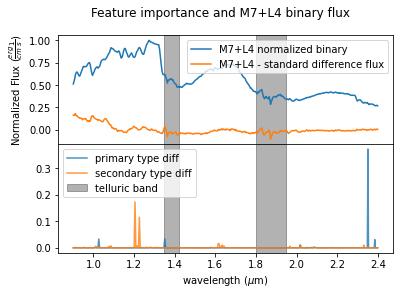

In [206]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,binhig)
ax[0].plot(wavegrid,dhig)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7+L4 normalized binary','M7+L4 - standard difference flux'])

feat_impts_hig_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfhig_d.estimators_:
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

for clf in clfhig_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[409:], alpha=0.8)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type diff', 'secondary type diff', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_hig_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_hig_d['primary_type']['importance'] = eee[0]
feat_impts_hig_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_hig_d['secondary_type']['importance'] = eee[1]
feat_impts_hig_d

In [207]:
precisionprim_higd1, recallprim_higd1, f1_scoreprim_higd1, accuracyprim_higd1 = calculate_metrics(realprim_hig_d,predsprim_hig_d,1)
precisionsec_higd1, recallsec_higd1, f1_scoresec_higd1, accuracysec_higd1 = calculate_metrics(realsec_hig_d,predssec_hig_d,1)
precisionprim_higd3, recallprim_higd3, f1_scoreprim_higd3, accuracyprim_higd3 = calculate_metrics(realprim_hig_d,predsprim_hig_d,3)
precisionsec_higd3, recallsec_higd3, f1_scoresec_higd3, accuracysec_higd3 = calculate_metrics(realsec_hig_d,predssec_hig_d,3)

In [208]:
with open('data/precisionprim_higd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_higd1, file)
with open('data/recallprim_higd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_higd1, file)
with open('data/f1_scoreprim_higd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_higd1, file)
with open('data/accuracyprim_higd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_higd1, file)

In [209]:
with open('data/precisionsec_higd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_higd1, file)
with open('data/recallsec_higd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_higd1, file)
with open('data/f1_scoresec_higd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_higd1, file)
with open('data/accuracysec_higd1_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_higd1, file)

In [210]:
with open('data/precisionprim_higd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_higd3, file)
with open('data/recallprim_higd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_higd3, file)
with open('data/f1_scoreprim_higd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_higd3, file)
with open('data/accuracyprim_higd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_higd3, file)

In [211]:
with open('data/precisionsec_higd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_higd3, file)
with open('data/recallsec_higd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_higd3, file)
with open('data/f1_scoresec_higd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_higd3, file)
with open('data/accuracysec_higd3_Burg_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_higd3, file)